In [1]:
import pandas as pd
import os

# 设置数据目录 (假设当前在 notebooks/ 目录下，向上两级找到 data/raw)
# 这里的 '..' 相对路径取决于你的 notebook 启动位置
# 如果是在 notebooks 文件夹内启动 jupyter，则用 '../data/raw'
DATA_PATH = '../data/raw'

print(f"正在检查数据目录: {os.path.abspath(DATA_PATH)}")

def inspect_csv(file_name, header_setting='infer'):
    file_path = os.path.join(DATA_PATH, file_name)
    print(f"\n[{file_name}] 加载中...")

    try:
        # 读取前 5 行用于快速检查
        df = pd.read_csv(file_path, header=header_setting, nrows=5)
        print(f"✅ 加载成功")
        print(f"   推断的列名 (Columns): {list(df.columns)}")
        print(f"   前两行数据预览:\n{df.head(2)}")

        # 再次读取完整形状 (仅读取形状，不加载全量数据以节省内存，如果是大文件)
        # 这里的 Elliptic 数据量 3060 Laptop 完全可以处理，直接读取形状即可
        # 为了演示严谨性，这里我们直接读全量看 Shape，因为后续反正要用
        df_full = pd.read_csv(file_path, header=header_setting)
        print(f"   完整数据形状 (Shape): {df_full.shape}")
        return df_full

    except FileNotFoundError:
        print(f"❌ 错误: 未找到文件 {file_path}，请检查路径。")
        return None

# 1. 检查 Classes (预期有表头: txId, class)
df_classes = inspect_csv('elliptic_txs_classes.csv', header_setting='infer')

# 2. 检查 Edges (预期有表头: txId1, txId2)
df_edges = inspect_csv('elliptic_txs_edgelist.csv', header_setting='infer')

# 3. 检查 Features (预期无表头，应该是纯数据)
# 我们先尝试 header=None，看看读出来是否整齐
df_features = inspect_csv('elliptic_txs_features.csv', header_setting=None)

正在检查数据目录: D:\25北工商_应统学习记录\python\Elliptic Data Set\data\raw

[elliptic_txs_classes.csv] 加载中...
✅ 加载成功
   推断的列名 (Columns): ['txId', 'class']
   前两行数据预览:
        txId    class
0  230425980  unknown
1    5530458  unknown
   完整数据形状 (Shape): (203769, 2)

[elliptic_txs_edgelist.csv] 加载中...
✅ 加载成功
   推断的列名 (Columns): ['txId1', 'txId2']
   前两行数据预览:
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
   完整数据形状 (Shape): (234355, 2)

[elliptic_txs_features.csv] 加载中...
✅ 加载成功
   推断的列名 (Columns): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 

Step 1: Loading Data...

--- 原始数据分布 (Original Distribution) ---
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64

Step 2: Filtering 'Unknown' classes for Supervised Learning...
--- 清洗后数据分布 (Cleaned Distribution) ---
class_label
Licit      42019
Illicit     4545
Name: count, dtype: int64
非法样本占比 (Illicit Rate): 9.76%


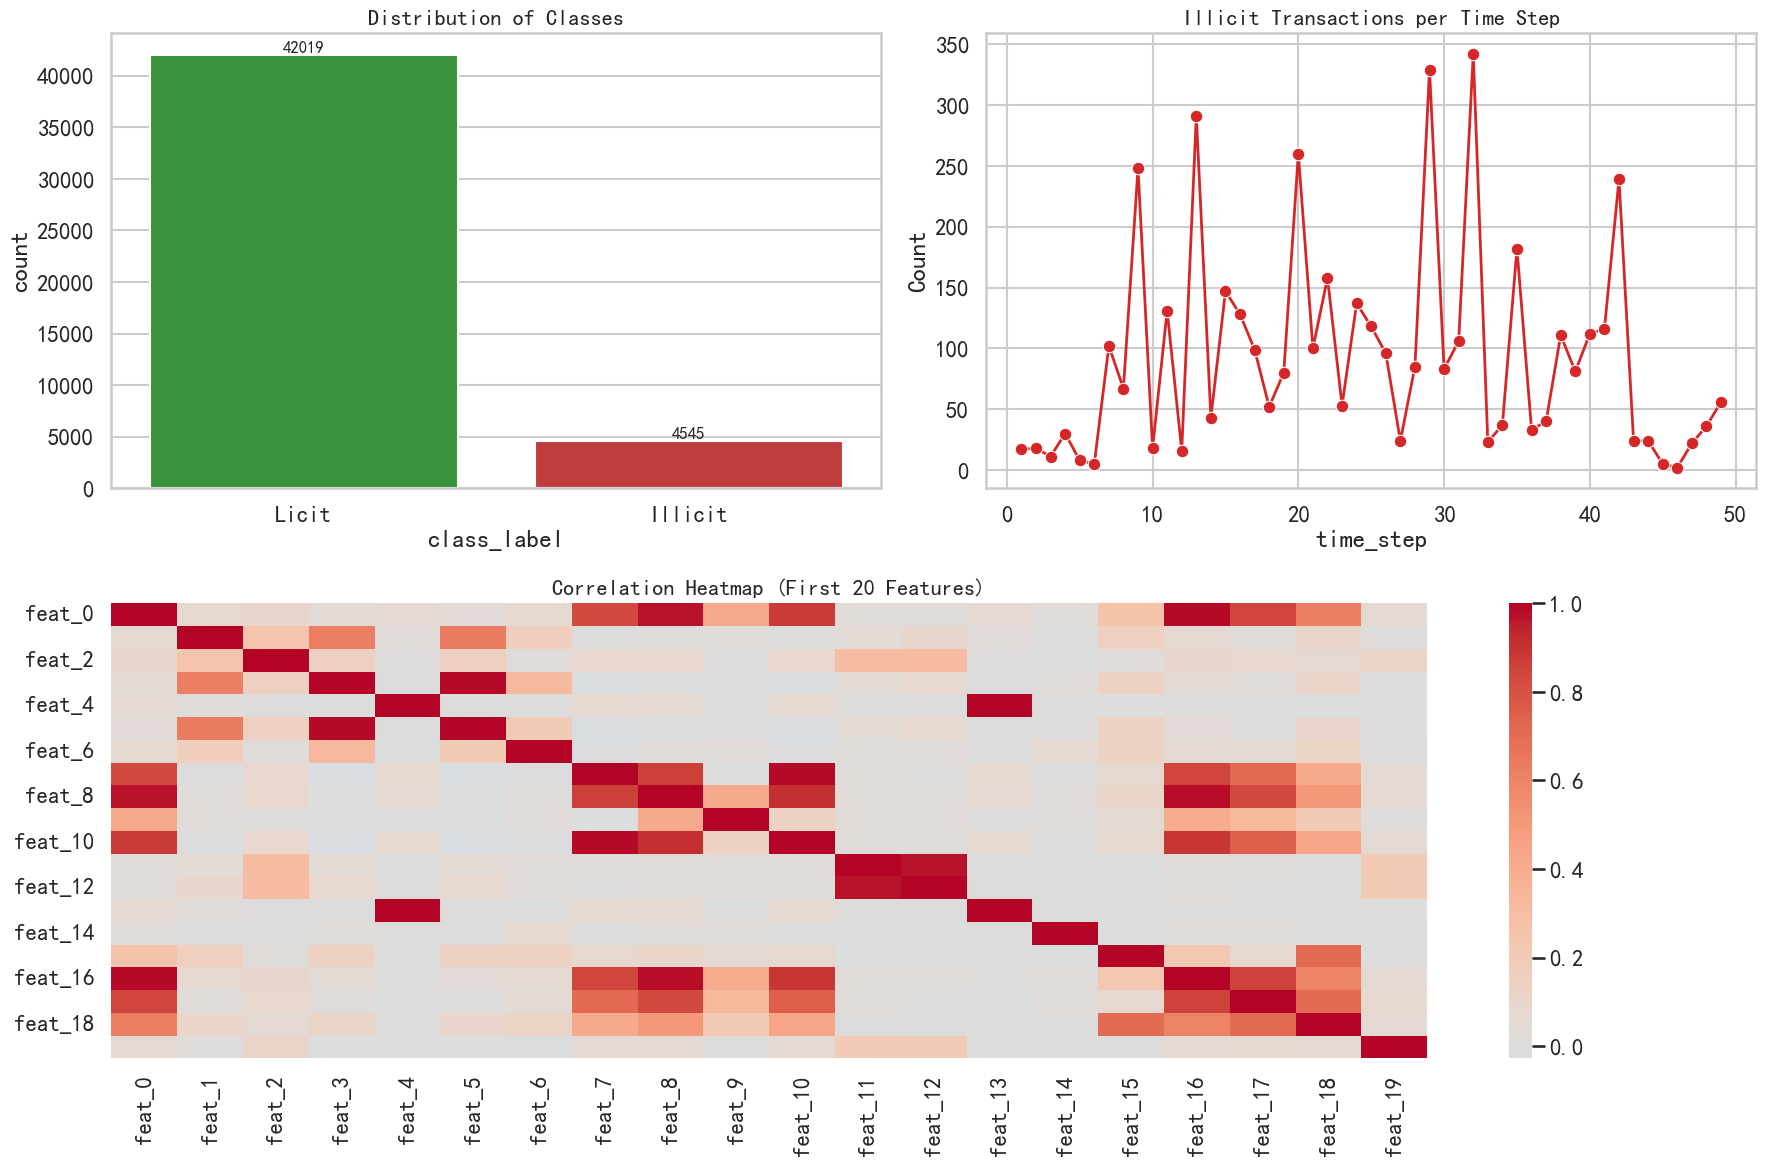


   >>> 复制下方内容给我 <<<
[数据概览]
- 总样本数 (Cleaned): 46564
- 合法样本 (Licit): 42019
- 非法样本 (Illicit): 4545
- 非法样本占比 (Illicit Rate): 9.76%

[时间序列分析]
- 非法交易峰值出现在 Time Step: 32
- 峰值交易量: 342
- 平均每步非法交易量: 92.76
- 峰值是平均值的 3.7 倍

Step 4: Saving cleaned data to ../data/processed\elliptic_cleaned.csv...
✅ EDA 完成，清洗后的数据已保存。

   >>> 5. 特征相关性排查 <<<
发现 93 对特征的相关系数绝对值 > 0.95
建议后续模型 (如 Logistic Regression) 考虑去除 64 个冗余特征。

--- Top 15 高相关特征对 (Top 15 Correlated Pairs) ---
Feature_A Feature_B  Corr_Coef
  feat_23   feat_29   1.000000
  feat_22   feat_28   1.000000
  feat_24   feat_30   1.000000
  feat_21   feat_27   1.000000
  feat_58   feat_64   1.000000
  feat_60   feat_66   1.000000
   feat_4   feat_13   1.000000
  feat_59   feat_65   1.000000
  feat_57   feat_63   0.999996
  feat_25   feat_31   0.999234
  feat_26   feat_32   0.999204
 feat_151  feat_152   0.999066
  feat_33   feat_36   0.997444
 feat_100  feat_102   0.997019
  feat_73   feat_74   0.995979

   >>> 6. 时间序列周期性 (Autocorrelation) <<<


<Figure size 1200x600 with 0 Axes>

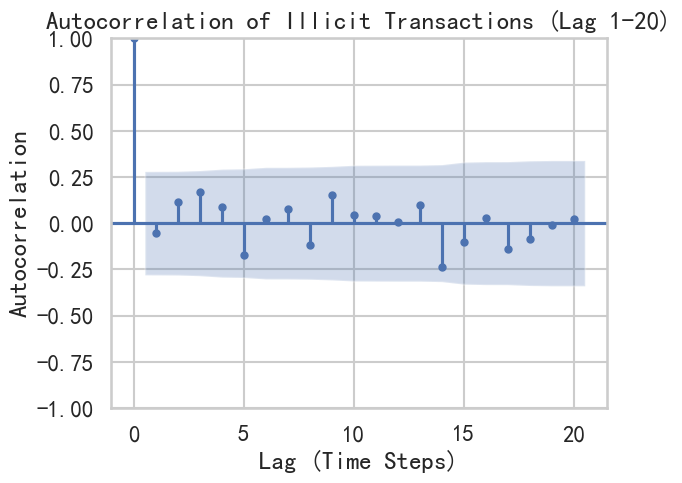

解读提示：
1. 观察 ACF 图中哪些 Lag (滞后阶数) 超出了蓝色阴影区域（置信区间）。
2. 如果 Lag 5 或 Lag 10 显著，说明可能存在 5 或 10 个时间步的循环周期。


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import os

# ==========================================
# 0. 环境设置与全局配置
# ==========================================
# 设置绘图风格，确保学术图表的美观性
sns.set_theme(style="whitegrid", context="talk")
# 解决中文显示问题 (如有)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']
plt.rcParams['axes.unicode_minus'] = False

# 定义颜色盘：Illicit=红色(警示), Licit=绿色(安全)
PALETTE = {"Illicit": "#d62728", "Licit": "#2ca02c"}

DATA_PATH = '../data/raw'

# ==========================================
# 1. 数据加载与预处理 (Data Loading & Preprocessing)
# ==========================================
print("Step 1: Loading Data...")

# 1.1 加载 Classes
df_classes = pd.read_csv(os.path.join(DATA_PATH, 'elliptic_txs_classes.csv'))

# 1.2 加载 Features
# 注意：前两列分别是 txId 和 time_step
df_features = pd.read_csv(os.path.join(DATA_PATH, 'elliptic_txs_features.csv'), header=None)
# 重命名列：为了方便，我们只命名关键列，特征列保持 feat_0...feat_164
col_names = ['txId', 'time_step'] + [f'feat_{i}' for i in range(165)]
df_features.columns = col_names

# 1.3 合并数据 (Merge)
# 使用 Inner Join 确保数据对齐
df_merged = pd.merge(df_features, df_classes, on='txId', how='inner')

# 1.4 原始数据统计 (含 Unknown)
print("\n--- 原始数据分布 (Original Distribution) ---")
print(df_merged['class'].value_counts())

# ==========================================
# 2. 数据清洗：移除 Unknown 标签
# ==========================================
# 这里的逻辑是：传统的监督学习无法利用无标签数据 (Unknown)。
# 在 Elliptic 任务中，我们只关心已知为非法或合法的交易。
print("\nStep 2: Filtering 'Unknown' classes for Supervised Learning...")

# 过滤掉 'unknown' 类别
df_clean = df_merged[df_merged['class'] != 'unknown'].copy()

# 映射标签：'1' -> Illicit, '2' -> Licit
class_mapping = {'1': 'Illicit', '2': 'Licit'}
df_clean['class_label'] = df_clean['class'].map(class_mapping)

# 打印清洗后的统计信息
print("--- 清洗后数据分布 (Cleaned Distribution) ---")
counts = df_clean['class_label'].value_counts()
print(counts)
illicit_rate = counts['Illicit'] / len(df_clean)
print(f"非法样本占比 (Illicit Rate): {illicit_rate:.2%}")

# ==========================================
# 3. 可视化分析 (Visualizations) - 修正版
# ==========================================
# 颜色盘
PALETTE = {"Illicit": "#d62728", "Licit": "#2ca02c"}

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# --- Plot 1: 类别分布 (修复警告) ---
ax1 = fig.add_subplot(gs[0, 0])
# Fix: 显式设置 hue=x, legend=False
sns.countplot(data=df_clean, x='class_label', hue='class_label', palette=PALETTE, order=['Licit', 'Illicit'], ax=ax1, legend=False)
ax1.set_title('Distribution of Classes', fontsize=16, fontweight='bold')
# 添加数值标注
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# --- Plot 2: 时间序列分析 ---
ax2 = fig.add_subplot(gs[0, 1])
time_analysis = df_clean[df_clean['class_label'] == 'Illicit'].groupby('time_step').size()
# 补全缺失的时间步（如果有），设为0，保证曲线连续性
all_steps = pd.Series(0, index=range(1, 50))
time_analysis = time_analysis.combine_first(all_steps).fillna(0)

sns.lineplot(x=time_analysis.index, y=time_analysis.values, color='#d62728', marker='o', linewidth=2, ax=ax2)
ax2.set_title('Illicit Transactions per Time Step', fontsize=16, fontweight='bold')
ax2.set_ylabel('Count')

# --- Plot 3: 相关性热力图 ---
ax3 = fig.add_subplot(gs[1, :])
feature_cols = [f'feat_{i}' for i in range(20)]
corr_matrix = df_clean[feature_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=ax3)
ax3.set_title('Correlation Heatmap (First 20 Features)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================================
# 4. [AUTOMATED SUMMARY] 自动总结输出
# ==========================================
# 自动计算关键指标
total_samples = len(df_clean)
illicit_count = len(df_clean[df_clean['class_label']=='Illicit'])
licit_count = len(df_clean[df_clean['class_label']=='Licit'])
illicit_rate = illicit_count / total_samples

# 寻找非法交易的峰值时间步
peak_step = time_analysis.idxmax()
peak_val = time_analysis.max()
mean_val = time_analysis.mean()

print("\n" + "="*40)
print("   >>> 复制下方内容给我 <<<")
print("="*40)
print(f"[数据概览]")
print(f"- 总样本数 (Cleaned): {total_samples}")
print(f"- 合法样本 (Licit): {licit_count}")
print(f"- 非法样本 (Illicit): {illicit_count}")
print(f"- 非法样本占比 (Illicit Rate): {illicit_rate:.2%}")
print(f"\n[时间序列分析]")
print(f"- 非法交易峰值出现在 Time Step: {peak_step}")
print(f"- 峰值交易量: {int(peak_val)}")
print(f"- 平均每步非法交易量: {mean_val:.2f}")
print(f"- 峰值是平均值的 {peak_val/mean_val:.1f} 倍")
print("="*40)

# ==========================================
# 4. 数据保存 (Save for ML Models)
# ==========================================
# 为了避免后续每个模型都重复清洗，我们将清洗后的数据保存为 pickle 或 csv
# Pickle 读取速度比 CSV 快得多，适合中间数据
save_path = '../data/processed'
os.makedirs(save_path, exist_ok=True)
output_file = os.path.join(save_path, 'elliptic_cleaned.csv')

print(f"\nStep 4: Saving cleaned data to {output_file}...")
# 仅保存需要的列，减小体积
df_clean.to_csv(output_file, index=False)
print("✅ EDA 完成，清洗后的数据已保存。")


# ==========================================
# 5. [深入分析] 特征相关性挖掘 (Feature Correlation Mining)
# ==========================================
print("\n" + "="*40)
print("   >>> 5. 特征相关性排查 <<<")
print("="*40)

def report_high_correlations(df, threshold=0.9):
    """
    报告相关系数高于阈值的特征对，帮助识别多重共线性。
    """
    # 仅选择数值型特征，排除 class_label 等
    numeric_cols = [c for c in df.columns if c.startswith('feat_')]

    # 计算相关性矩阵 (绝对值，因为负相关也是强相关)
    corr_matrix = df[numeric_cols].corr().abs()

    # 只取上三角矩阵，避免重复 (A-B 和 B-A) 和自相关 (A-A)
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # 筛选出大于阈值的列
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

    # 整理成表格形式输出
    high_corr_pairs = []
    for col in upper_tri.columns:
        # 找到与该列相关性 > threshold 的行
        high_corr_series = upper_tri[col][upper_tri[col] > threshold]
        for idx, val in high_corr_series.items():
            high_corr_pairs.append({'Feature_A': idx, 'Feature_B': col, 'Corr_Coef': val})

    df_pairs = pd.DataFrame(high_corr_pairs).sort_values(by='Corr_Coef', ascending=False)

    print(f"发现 {len(df_pairs)} 对特征的相关系数绝对值 > {threshold}")
    print(f"建议后续模型 (如 Logistic Regression) 考虑去除 {len(to_drop)} 个冗余特征。")
    print("\n--- Top 15 高相关特征对 (Top 15 Correlated Pairs) ---")
    if not df_pairs.empty:
        print(df_pairs.head(15).to_string(index=False))
    else:
        print("无高度相关的特征对。")

    return df_pairs

# 执行分析 (阈值设为 0.95，非常严格)
high_corr_df = report_high_correlations(df_clean, threshold=0.95)

# ==========================================
# 6. [深入分析] 周期性验证 (Periodicity Check)
# ==========================================
print("\n" + "="*40)
print("   >>> 6. 时间序列周期性 (Autocorrelation) <<<")
print("="*40)

# 准备时间序列数据
ts_data = df_clean[df_clean['class_label'] == 'Illicit'].groupby('time_step').size()
# 补全缺失步
ts_data = ts_data.combine_first(pd.Series(0, index=range(1, 50))).fillna(0)

# 绘制自相关图 (ACF)
# 如果 Lag k 的柱子很高，说明第 t 步和第 t-k 步有强关联
plt.figure(figsize=(12, 6))
plot_acf(ts_data, lags=20, alpha=0.05, title='Autocorrelation of Illicit Transactions (Lag 1-20)')
plt.xlabel('Lag (Time Steps)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

print("解读提示：")
print("1. 观察 ACF 图中哪些 Lag (滞后阶数) 超出了蓝色阴影区域（置信区间）。")
print("2. 如果 Lag 5 或 Lag 10 显著，说明可能存在 5 或 10 个时间步的循环周期。")
print("="*40)

>>> 0. 正在进行数据类型安全检查...
Class 列已强制转换为整数 (1:非法, 2:合法)

>>> 1. 开始特征清洗...
参与相关性计算的特征数量: 166
检测到 65 个冗余特征，准备删除...
✅ 特征清洗完成！当前特征矩阵形状: (46564, 104)

>>> 2. 正在构建交易网络...
图构建完成！Nodes: 35874, Edges: 36624

>>> 3.1 正在计算同质性...
非法节点同质性 (坏人连接坏人的概率): 50.97%
合法节点同质性 (好人连接好人的概率): 98.19%

>>> 3.2 正在绘制局部网络...


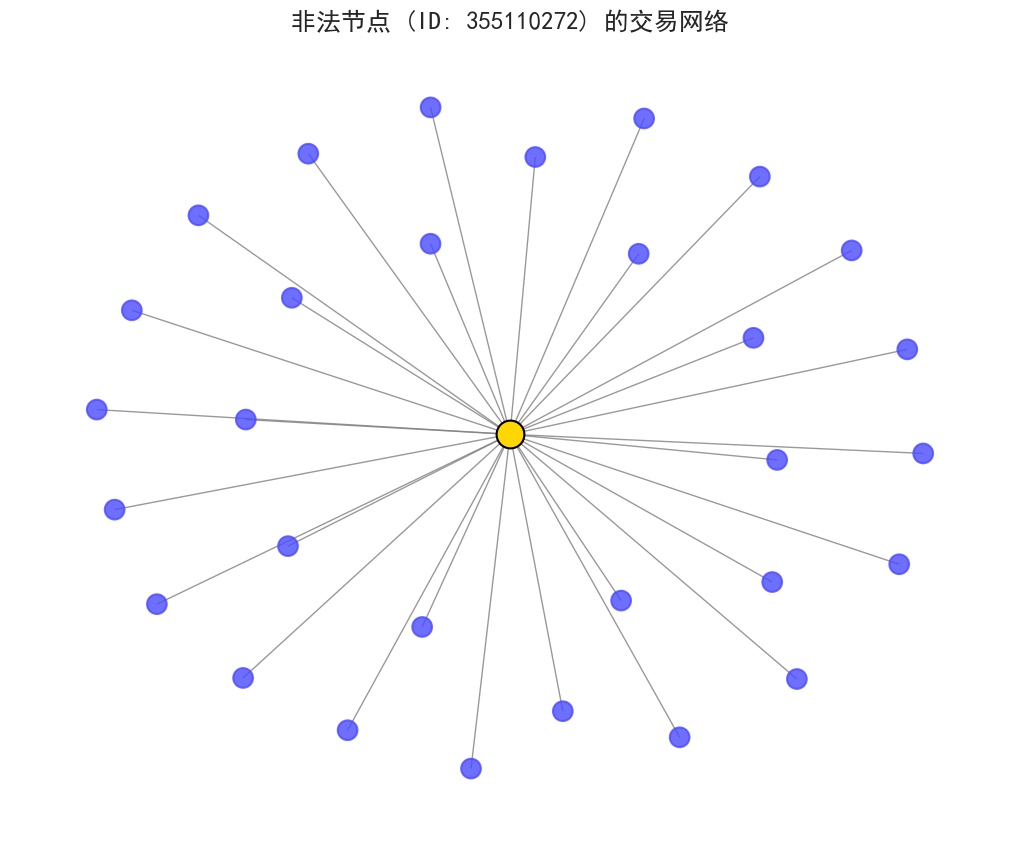

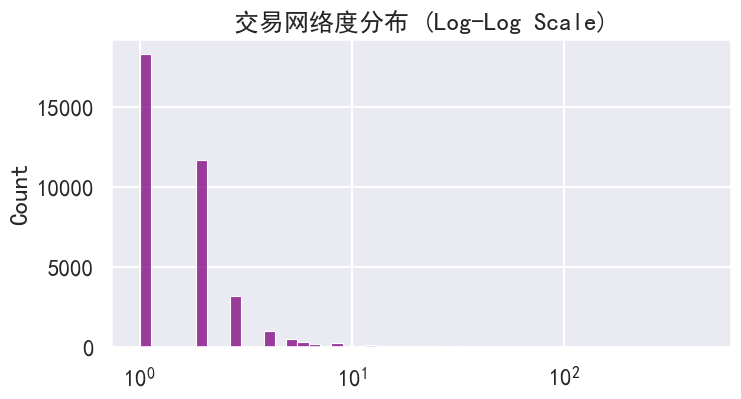

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# 设置绘图风格
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 步骤 0: 彻底清洗与类型强制
# ==========================================
# 为了防止内存中残留旧数据，强烈建议重新读取一次已清洗的数据
# 如果你确信 df 是最新的，可以注释掉下面这行
df = pd.read_csv('../data/processed/elliptic_cleaned.csv')

print(">>> 0. 正在进行数据类型安全检查...")

# 1. 确保 class 列是整数 (1和2)
# 无论它是 'Licit' 还是 '2'，这里统一清洗
def clean_class(x):
    if str(x) in ['Illicit', '1', '1.0']: return 1
    if str(x) in ['Licit', '2', '2.0']: return 2
    return 2 # 默认设为合法 (Unknown)

if 'class' in df.columns:
    df['class'] = df['class'].apply(clean_class).astype(int)
    print("Class 列已强制转换为整数 (1:非法, 2:合法)")

# ==========================================
# 步骤 1: 特征清洗 (只针对数值列)
# ==========================================
print("\n>>> 1. 开始特征清洗...")

# 【关键修复】这里不再依赖列名排除，而是直接筛选“数值型”列
# 这会自动把所有包含字符串（如 'Licit'）的列全部踢出，绝对不会报错
numeric_df = df.select_dtypes(include=[np.number])

# 从数值列中再排除掉非特征列 (ID, Time, Label)
exclude_cols = ['class', 'Time step', 'txId']
feature_cols = [c for c in numeric_df.columns if c not in exclude_cols]

print(f"参与相关性计算的特征数量: {len(feature_cols)}")

# 计算相关性
corr_matrix = df[feature_cols].corr().abs()

# 筛选高相关性特征 (> 0.95)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"检测到 {len(to_drop)} 个冗余特征，准备删除...")
df_final = df.drop(columns=to_drop)

print(f"✅ 特征清洗完成！当前特征矩阵形状: {df_final.shape}")

# ==========================================
# 步骤 2: 构建图结构
# ==========================================
print("\n>>> 2. 正在构建交易网络...")

try:
    # 读取边列表
    edges = pd.read_csv('../data/raw/elliptic_txs_edgelist.csv') # 请确保路径正确
except FileNotFoundError:
    edges = pd.read_csv('elliptic_txs_edgelist.csv')

# 过滤边
valid_nodes = set(df_final['txId'])
edges_filtered = edges[edges['txId1'].isin(valid_nodes) & edges['txId2'].isin(valid_nodes)]

# 建图
G = nx.from_pandas_edgelist(edges_filtered, 'txId1', 'txId2', create_using=nx.Graph())

# 添加标签属性
node_labels = df_final.set_index('txId')['class'].to_dict()
nx.set_node_attributes(G, node_labels, 'label')

print(f"图构建完成！Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# ==========================================
# 步骤 3: 核心指标 EDA
# ==========================================

# --- 3.1 同质性 (Homophily) ---
print("\n>>> 3.1 正在计算同质性...")

def calculate_homophily(graph, target_class):
    nodes = [n for n, attr in graph.nodes(data=True) if attr.get('label') == target_class]
    if not nodes: return 0.0
    ratios = []
    for node in nodes:
        nbrs = list(graph.neighbors(node))
        if not nbrs: continue
        same = sum(1 for n in nbrs if graph.nodes[n].get('label') == target_class)
        ratios.append(same / len(nbrs))
    return np.mean(ratios) if ratios else 0

h_illicit = calculate_homophily(G, 1)
h_licit = calculate_homophily(G, 2)

print(f"非法节点同质性 (坏人连接坏人的概率): {h_illicit:.2%}")
print(f"合法节点同质性 (好人连接好人的概率): {h_licit:.2%}")

# --- 3.2 可视化非法团伙 ---
print("\n>>> 3.2 正在绘制局部网络...")
illicit_nodes = [n for n, attr in G.nodes(data=True) if attr.get('label') == 1]

if illicit_nodes:
    # 找度最大的非法节点
    degrees = dict(G.degree(illicit_nodes))
    target = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[0][0]

    # 提取子图
    subset = list(G.neighbors(target)) + [target]
    H = G.subgraph(subset)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(H, seed=42, k=0.5)

    # 1=Red(Bad), 2=Blue(Good)
    colors = ['#FF4B4B' if H.nodes[n].get('label')==1 else '#4B4BFF' for n in H.nodes()]

    nx.draw(H, pos, node_color=colors, with_labels=False, node_size=200, edge_color='gray', alpha=0.8)
    # 高亮中心
    nx.draw_networkx_nodes(H, pos, nodelist=[target], node_color='gold', node_size=400, edgecolors='black')

    plt.title(f"非法节点 (ID: {target}) 的交易网络")
    plt.show()

# --- 3.3 度分布 ---
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(8, 4))
sns.histplot(degrees, bins=50, log_scale=True, color='purple')
plt.title("交易网络度分布 (Log-Log Scale)")
plt.show()